This script explores naive Bayes, logistic regression, SVM, and neural network. For feature extraction, see FeatureExtraction.ipynb.

In [1]:
import numpy as np
import pandas as pd
import pickle
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

from keras.models import Model,Sequential
from keras.layers import Input, Dense, Activation

In [2]:
# read in processed data
train = pd.read_csv('../data/trainpp.csv')
test = pd.read_csv('../data/testpp.csv')

# read in trained tf-idf
with open('../data/tfidf.pkl', 'r') as f:
    [tfidf1, tfidf2] = pickle.load(f)

In [11]:
# feature extractions
train_features1 = tfidf1.transform(train['reviewText'])
train_features2 = tfidf2.transform(train['reviewText'])

test_features1 = tfidf1.transform(test['reviewText'])
test_features2 = tfidf2.transform(test['reviewText'])

train_y = train.sentiment.values
test_y = test.sentiment.values

print 'size of bag-of-word features: ',train_features1.shape
print 'size of 2-gram features: ',train_features2.shape

size of bag-of-word features:  (25000, 10000)
size of 2-gram features:  (25000, 20000)


### naive Bayes

In [14]:
nb_model1 = MultinomialNB()
nb_model1.fit(train_features1, train_y)
nb_pred1 = nb_model1.predict(test_features1)

nb_model2 = MultinomialNB()
nb_model2.fit(train_features2, train_y)
nb_pred2 = nb_model2.predict(test_features2)

In [21]:
print 'test accuracy for bag-of-word: %0.3f'% metrics.accuracy_score(test_y, nb_pred1)
print metrics.classification_report(test_y, nb_pred1)
print 'test accuracy for 2-gram: %0.3f'% metrics.accuracy_score(test_y, nb_pred2)
print metrics.classification_report(test_y, nb_pred2)

test accuracy for bag-of-word: 0.833
             precision    recall  f1-score   support

          0       0.81      0.87      0.84     12500
          1       0.86      0.80      0.83     12500

avg / total       0.84      0.83      0.83     25000

test accuracy for 2-gram: 0.856
             precision    recall  f1-score   support

          0       0.85      0.87      0.86     12500
          1       0.87      0.84      0.85     12500

avg / total       0.86      0.86      0.86     25000



### SVM

In [23]:
svm_model1 = LinearSVC()
svm_model1.fit(train_features1, train_y)
svm_pred1 = svm_model1.predict(test_features1)

svm_model2 = LinearSVC()
svm_model2.fit(train_features2, train_y)
svm_pred2 = svm_model2.predict(test_features2)

In [24]:
print 'test accuracy for bag-of-word: %0.3f'% metrics.accuracy_score(test_y, svm_pred1)
print metrics.classification_report(test_y, svm_pred1)
print 'test accuracy for 2-gram: %0.3f'% metrics.accuracy_score(test_y, svm_pred2)
print metrics.classification_report(test_y, svm_pred2)

test accuracy for bag-of-word: 0.864
             precision    recall  f1-score   support

          0       0.86      0.88      0.87     12500
          1       0.87      0.85      0.86     12500

avg / total       0.86      0.86      0.86     25000

test accuracy for 2-gram: 0.875
             precision    recall  f1-score   support

          0       0.87      0.89      0.88     12500
          1       0.88      0.86      0.87     12500

avg / total       0.88      0.88      0.88     25000



### logistic regression

In [29]:
lr_model1 = LogisticRegression()
lr_model1.fit(train_features1, train_y)
lr_pred1 = lr_model1.predict(test_features1)

lr_model2 = LogisticRegression()
lr_model2.fit(train_features2, train_y)
lr_pred2 = lr_model2.predict(test_features2)

In [30]:
print 'test accuracy for bag-of-word: %0.3f'% metrics.accuracy_score(test_y, lr_pred1)
print metrics.classification_report(test_y, lr_pred1)
print 'test accuracy for 2-gram: %0.3f'% metrics.accuracy_score(test_y, lr_pred2)
print metrics.classification_report(test_y, lr_pred2)

test accuracy for bag-of-word: 0.881
             precision    recall  f1-score   support

          0       0.88      0.88      0.88     12500
          1       0.88      0.88      0.88     12500

avg / total       0.88      0.88      0.88     25000

test accuracy for 2-gram: 0.887
             precision    recall  f1-score   support

          0       0.89      0.89      0.89     12500
          1       0.89      0.89      0.89     12500

avg / total       0.89      0.89      0.89     25000



### neural network

In [108]:
# helper function for plotting

def plotFitHistory(h, nepoch):
    # fitting history
    # compare training, validation loss and accuracy
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(h['loss'], color='blue', marker='o', label='training loss')
    plt.plot(h['val_loss'], color='red',marker='*', label='validation loss')
    plt.legend(loc='right')
    plt.xticks(range(nepoch),range(1,nepoch+1));
    plt.xlabel('epoch')
    # plot 2
    plt.subplot(1,2,2)
    plt.plot(h['acc'], color='blue', marker='o', label='training acc')
    plt.plot(h['val_acc'], color='red',marker='*', label='validation acc')
    plt.legend(loc='right')
    plt.xticks(range(nepoch),range(1,nepoch+1));
    plt.xlabel('epoch')
    plt.show()

In [51]:
# train-validation split
X_train1, X_val1, y_train1, y_val1 = train_test_split(train_features1, train_y,\
    test_size=0.3, random_state=1234, stratify = train_y)

X_train2, X_val2, y_train2, y_val2 = train_test_split(train_features2, train_y,\
    test_size=0.3, random_state=1234, stratify = train_y)

In [126]:
inputs = Input(shape=(10000,), sparse=True)
X = Dense(128, input_dim=10000, activation='tanh')(inputs)
X = Dense(64, input_dim=128, activation='tanh')(X)
Y = Dense(1, activation='sigmoid')(X)
nn_model1 = Model(inputs=inputs, outputs=Y)
nn_model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

inputs = Input(shape=(20000,), sparse=True)
X = Dense(128, input_dim=20000, activation='tanh')(inputs)
X = Dense(64, input_dim=128, activation='tanh')(X)
Y = Dense(1, activation='sigmoid')(X)
nn_model2 = Model(inputs=inputs, outputs=Y)
nn_model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

* train_features1: bag-of-word

In [111]:
nepoch1 = 10
h1 = nn_model1.fit(X_train1, y_train1, epochs=nepoch1, batch_size=500, validation_data=(X_val1, y_val1))

Train on 17500 samples, validate on 7500 samples
Epoch 1/10
17500/17500 [==============================] - 3s - loss: 0.5066 - acc: 0.8055 - val_loss: 0.3251 - val_acc: 0.8661
Epoch 2/10
17500/17500 [==============================] - 1s - loss: 0.2183 - acc: 0.9175 - val_loss: 0.2781 - val_acc: 0.8883
Epoch 3/10
17500/17500 [==============================] - 1s - loss: 0.1328 - acc: 0.9552 - val_loss: 0.3118 - val_acc: 0.8811
Epoch 4/10
17500/17500 [==============================] - 1s - loss: 0.0834 - acc: 0.9775 - val_loss: 0.3739 - val_acc: 0.8733
Epoch 5/10
17500/17500 [==============================] - 1s - loss: 0.0503 - acc: 0.9887 - val_loss: 0.4528 - val_acc: 0.8667
Epoch 6/10
17500/17500 [==============================] - 1s - loss: 0.0284 - acc: 0.9963 - val_loss: 0.5395 - val_acc: 0.8612
Epoch 7/10
17500/17500 [==============================] - 1s - loss: 0.0154 - acc: 0.9989 - val_loss: 0.6109 - val_acc: 0.8616
Epoch 8/10
17500/17500 [==============================] - 1s -

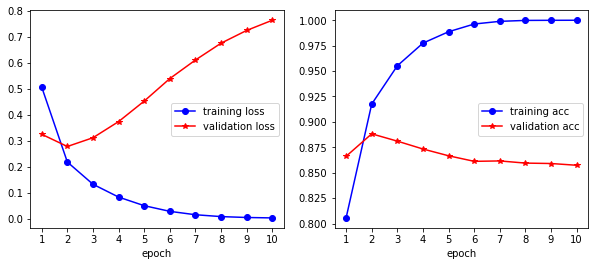

In [113]:
plotFitHistory(h1.history, nepoch1)

In [134]:
# train on entire training set
inputs = Input(shape=(10000,), sparse=True)
X = Dense(128, input_dim=10000, activation='tanh')(inputs)
X = Dense(64, input_dim=128, activation='tanh')(X)
Y = Dense(1, activation='sigmoid')(X)
nn_model1 = Model(inputs=inputs, outputs=Y)
nn_model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

nn_model1.fit(train_features1, train_y, epochs=2, batch_size=500)

Epoch 1/2
25000/25000 [==============================] - 3s - loss: 0.4420 - acc: 0.8294     
Epoch 2/2
25000/25000 [==============================] - 1s - loss: 0.1977 - acc: 0.9237     


In [142]:
nn_pred1 = nn_model1.predict(test_features1)[:,0]>0.5

print 'test accuracy for bag-of-word: %0.3f'% metrics.accuracy_score(test_y, nn_pred1)
print metrics.classification_report(test_y, nn_pred1)

test accuracy for bag-of-word: 0.866
             precision    recall  f1-score   support

          0       0.85      0.89      0.87     12500
          1       0.89      0.84      0.86     12500

avg / total       0.87      0.87      0.87     25000



* train_features2: 2-gram

In [127]:
nepoch2 = 10
h2 = nn_model2.fit(X_train2, y_train2, epochs=nepoch2, batch_size=500, validation_data=(X_val2, y_val2))

Train on 17500 samples, validate on 7500 samples
Epoch 1/10
17500/17500 [==============================] - 4s - loss: 0.4758 - acc: 0.8062 - val_loss: 0.2905 - val_acc: 0.8803
Epoch 2/10
17500/17500 [==============================] - 2s - loss: 0.1666 - acc: 0.9385 - val_loss: 0.2690 - val_acc: 0.8929
Epoch 3/10
17500/17500 [==============================] - 2s - loss: 0.0702 - acc: 0.9833 - val_loss: 0.3084 - val_acc: 0.8872
Epoch 4/10
17500/17500 [==============================] - 2s - loss: 0.0248 - acc: 0.9973 - val_loss: 0.3605 - val_acc: 0.8852
Epoch 5/10
17500/17500 [==============================] - 2s - loss: 0.0087 - acc: 0.9999 - val_loss: 0.4037 - val_acc: 0.8840
Epoch 6/10
17500/17500 [==============================] - 2s - loss: 0.0042 - acc: 1.0000 - val_loss: 0.4343 - val_acc: 0.8839
Epoch 7/10
17500/17500 [==============================] - 2s - loss: 0.0026 - acc: 1.0000 - val_loss: 0.4584 - val_acc: 0.8829
Epoch 8/10
17500/17500 [==============================] - 2s -

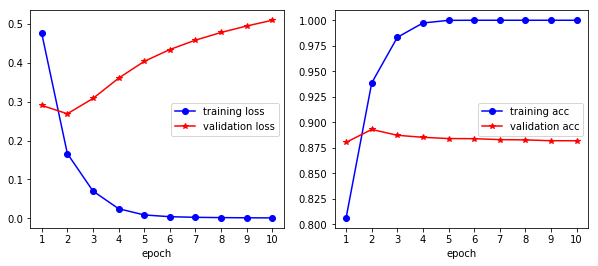

In [128]:
plotFitHistory(h2.history, nepoch2)

In [143]:
# train on entire training set
inputs = Input(shape=(20000,), sparse=True)
X = Dense(128, input_dim=20000, activation='tanh')(inputs)
X = Dense(64, input_dim=128, activation='tanh')(X)
Y = Dense(1, activation='sigmoid')(X)
nn_model2 = Model(inputs=inputs, outputs=Y)
nn_model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

nn_model2.fit(train_features2, train_y, epochs=2, batch_size=500)

Epoch 1/2
25000/25000 [==============================] - 5s - loss: 0.4224 - acc: 0.8450     
Epoch 2/2
25000/25000 [==============================] - 2s - loss: 0.1537 - acc: 0.9437     


In [144]:
nn_pred2 = nn_model2.predict(test_features2)[:,0]>0.5

print 'test accuracy for 2-gram: %0.3f'% metrics.accuracy_score(test_y, nn_pred2)
print metrics.classification_report(test_y, nn_pred2)

test accuracy for 2-gram: 0.879
             precision    recall  f1-score   support

          0       0.88      0.88      0.88     12500
          1       0.88      0.87      0.88     12500

avg / total       0.88      0.88      0.88     25000

